In [ ]:
!git clone https://github.com/sydney-machine-learning/sentimentanalysis_bhagavadgita.git

Cloning into 'sentimentanalysis_bhagavadgita'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 262 (delta 35), reused 244 (delta 20), pack-reused 0
Receiving objects: 100% (262/262), 10.46 MiB | 15.57 MiB/s, done.
Resolving deltas: 100% (35/35), done.


## Least Similar Verses

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

In [ ]:
egdf = pd.read_excel('/content/sentimentanalysis_bhagavadgita/results/semantic analysis/Least Similar Verses/easwaran gandhi.xlsx')

In [ ]:
mdf = pd.read_csv('/content/drive/MyDrive/xlmr_mg_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)
edf = pd.read_csv('/content/drive/MyDrive/xlmr_ee_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)
sdf = pd.read_csv('/content/drive/MyDrive/xlmr_sps_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)

In [ ]:
mdf

,chapter,shlok,text,list_metaphors,count_metaphors,refined,verb_refined,count_met_ref,count_verb_ref
0,1,1,"Tell me, O Sanjaya, what my sons and Pandu's...",['on'],1,[],[],0,0
1,1,2,On seeing the Arjuna's army drawn up in batt...,"['On', 'up in']",2,['up in'],[],1,0
2,1,3,"Behold, O preceptor, this mighty army of the...","['hold', 'this mighty', 'set in']",3,"['hold', 'this mighty', 'set in']",['set in'],3,1
3,1,4,"Here are brave bowmen, peers of Bhima and Ar...","['Here', 'pe', 'in']",3,"['Here', 'pe']",[],2,0
4,1,5,"Dhrishtaketu, Chekitana, valorous Kashiraja,...",[],0,[],[],0,0
...,...,...,...,...,...,...,...,...,...
692,18,73,Thus did I hear this marvellous and thrillin...,"['this', 'between', 'great', 'sou']",4,"['great', 'sou']",[],2,0
693,18,74,It was by Vyasa's favor that I listened to t...,"['to this', 'myste', 'expounded']",3,"['to this', 'myste', 'expounded']",['expounded'],3,1
694,18,75,"O King, as often as I recall that marvellous...","['recall that', 'purifying', 'between', 'fille...",5,"['recall that', 'purifying', 'filled with', 'r...","['purifying', 'filled with']",4,2
695,18,76,And as often as I recall that marvellous for...,"['recall that', 'form', 'knows', 'bounds']",4,"['recall that', 'form', 'knows', 'bounds']",[],4,0


In [ ]:
# 3, 5, 7, 8, 9, 10, 11, 12, 15, 16, 17 

In [ ]:
for i in range(1,19):
  print(len(mdf[mdf['chapter']==i]['shlok'].tolist()), len(edf[edf['chapter']==i]['shlok'].tolist()), len(sdf[sdf['chapter']==i]['shlok'].tolist()))

48 47 47
72 71 72
43 43 43
41 42 42
29 29 29
46 47 47
30 30 30
28 28 28
34 34 34
42 42 42
55 55 55
20 20 20
34 34 35
26 27 27
20 20 20
24 24 24
28 28 28
77 78 77


In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,6.0,3.0,7.0,But they excel who control their senses throug...,"But he, O Arjuna, who keeping all the senses...","But, O Arjuna! All honour to him whose mind c...",0.576629,0.838662,0.531871
1,9.0,3.0,10.0,"At the beginning, mankind and the obligation o...",Together with sacrifice did the Lord of bein...,"In the beginning, when God created all beings...",0.691054,0.818461,0.718607
2,18.0,3.0,19.0,Strive constantly to serve the welfare of the ...,"Therefore, do you ever perform without attac...","Therefore do your duty perfectly, without car...",0.591221,0.796652,0.624534
3,19.0,3.0,20.0,Do your work with the welfare of others always...,For through action alone Janaka and others ach...,King Janaka and others attained perfection th...,0.695338,0.898263,0.672022
4,32.0,3.0,33.0,Even the wise act within the limitations of th...,Even a man of knowledge acts according to his ...,Even the wise man acts in character with his ...,0.620646,0.901265,0.663313
5,41.0,3.0,42.0,"The senses are higher than the body, the mind ...","Subtle, they say, are the senses; subtler th...",It is said that the senses are powerful. But ...,0.657590,0.727049,0.830392
6,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497
7,53.0,5.0,11.0,"Renouncing their selfish attachments, those w...","Only with the body, mind and intellect and a...","The sage performs his action dispassionately,...",0.554742,0.638027,0.739116
8,54.0,5.0,12.0,Those whose consciousness is unified abandon ...,A man of yoga obtains everlasting peace by a...,"Having abandoned the fruit of action, he wins...",0.667696,0.720617,0.817349
9,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121


In [ ]:
eg_new = egdf.copy().drop('Unnamed: 0', axis =1)
# eg_new = eg_new[['Chapter', 'Verse', 'Eknath Easwaran', 'Mahatma Gandhi', 'Easwaran - Gandhi']]

In [ ]:
eg_new

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,3.0,7.0,But they excel who control their senses throug...,"But he, O Arjuna, who keeping all the senses...","But, O Arjuna! All honour to him whose mind c...",0.576629,0.838662,0.531871
1,3.0,10.0,"At the beginning, mankind and the obligation o...",Together with sacrifice did the Lord of bein...,"In the beginning, when God created all beings...",0.691054,0.818461,0.718607
2,3.0,19.0,Strive constantly to serve the welfare of the ...,"Therefore, do you ever perform without attac...","Therefore do your duty perfectly, without car...",0.591221,0.796652,0.624534
3,3.0,20.0,Do your work with the welfare of others always...,For through action alone Janaka and others ach...,King Janaka and others attained perfection th...,0.695338,0.898263,0.672022
4,3.0,33.0,Even the wise act within the limitations of th...,Even a man of knowledge acts according to his ...,Even the wise man acts in character with his ...,0.620646,0.901265,0.663313
5,3.0,42.0,"The senses are higher than the body, the mind ...","Subtle, they say, are the senses; subtler th...",It is said that the senses are powerful. But ...,0.657590,0.727049,0.830392
6,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497
7,5.0,11.0,"Renouncing their selfish attachments, those w...","Only with the body, mind and intellect and a...","The sage performs his action dispassionately,...",0.554742,0.638027,0.739116
8,5.0,12.0,Those whose consciousness is unified abandon ...,A man of yoga obtains everlasting peace by a...,"Having abandoned the fruit of action, he wins...",0.667696,0.720617,0.817349
9,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121


In [ ]:
mg_cmet_list = []
ee_cmet_list = []
sp_cmet_list = []
mg_cverb_list = []
ee_cverb_list = []
sp_cverb_list = []
mg_text = []
mg_vbtext = []
ee_text = []
ee_vbtext = []
sp_text = []
sp_vbtext = []

chap_list = eg_new['Chapter'].tolist()
verse_list = eg_new['Verse'].tolist()
for i in range(len(chap_list)):
  cno = int(chap_list[i])
  vno = int(verse_list[i])

  mg_cmet_list.append(int(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['count_met_ref'].values))
  ee_cmet_list.append(int(edf[edf['chapter']==cno][edf['shlok']==vno]['count_met_ref'].values))
  sp_cmet_list.append(int(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['count_met_ref'].values))

  mg_cverb_list.append(int(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['count_verb_ref'].values))
  ee_cverb_list.append(int(edf[edf['chapter']==cno][edf['shlok']==vno]['count_verb_ref'].values))
  sp_cverb_list.append(int(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['count_verb_ref'].values))

  mg_text.append(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['refined'].values)
  ee_text.append(edf[edf['chapter']==cno][edf['shlok']==vno]['refined'].values)
  sp_text.append(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['refined'].values)

  mg_vbtext.append(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['verb_refined'].values)
  ee_vbtext.append(edf[edf['chapter']==cno][edf['shlok']==vno]['verb_refined'].values)
  sp_vbtext.append(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['verb_refined'].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/li

In [ ]:
egdf['mg_cmet'] = mg_cmet_list
egdf['mg_cverb'] = mg_cverb_list
egdf['mg_met'] = mg_text
egdf['mg_verb'] = mg_vbtext

egdf['ee_cmet'] = ee_cmet_list
egdf['ee_cverb'] = ee_cverb_list
egdf['ee_met'] = ee_text
egdf['ee_verb'] = ee_vbtext

egdf['sp_cmet'] = sp_cmet_list
egdf['sp_cverb'] = sp_cverb_list
egdf['sp_met'] = sp_text
egdf['sp_verb'] = sp_vbtext

In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,mg_cmet,...,mg_met,mg_verb,ee_cmet,ee_cverb,ee_met,ee_verb,sp_cmet,sp_cverb,sp_met,sp_verb
0,6.0,3.0,7.0,But they excel who control their senses throug...,"But he, O Arjuna, who keeping all the senses...","But, O Arjuna! All honour to him whose mind c...",0.576629,0.838662,0.531871,4,...,"[['keeping', 'under control', 'engage', 'attac...",[['keeping']],2,0,"[['control', 'less service']]",[[]],4,1,"[['controls', 'Path', 'keeping', 'unattache']]",[['keeping']]
1,9.0,3.0,10.0,"At the beginning, mankind and the obligation o...",Together with sacrifice did the Lord of bein...,"In the beginning, when God created all beings...",0.691054,0.818461,0.718607,4,...,"[['Together with', 'Lord', 'By this', 'giver']]",[[]],2,1,"[['together', 'find']]",[['find']],3,0,"[['sacrifice', 'unto', 'Th']]",[[]]
2,18.0,3.0,19.0,Strive constantly to serve the welfare of the ...,"Therefore, do you ever perform without attac...","Therefore do your duty perfectly, without car...",0.591221,0.796652,0.624534,0,...,[[]],[[]],3,0,"[['serve', 'less', 'goal']]",[[]],0,0,[[]],[[]]
3,19.0,3.0,20.0,Do your work with the welfare of others always...,For through action alone Janaka and others ach...,King Janaka and others attained perfection th...,0.695338,0.898263,0.672022,2,...,"[['view to', 'guidance']]",[[]],1,1,[['followed this path']],[['followed this path']],0,0,[[]],[[]]
4,32.0,3.0,33.0,Even the wise act within the limitations of th...,Even a man of knowledge acts according to his ...,Even the wise man acts in character with his ...,0.620646,0.901265,0.663313,5,...,"[['nature', 'follow', 'nature', 'then', 'const...",[['follow']],3,0,"[['s', 'nature', 'pression']]",[[]],1,0,[['then']],[[]]
5,41.0,3.0,42.0,"The senses are higher than the body, the mind ...","Subtle, they say, are the senses; subtler th...",It is said that the senses are powerful. But ...,0.657590,0.727049,0.830392,0,...,[[]],[[]],1,0,[['higher']],[[]],2,0,"[['powerful', 'greater']]",[[]]
6,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497,5,...,"[['goal', 'attain', 'reached', 'se', 'sees']]",[['reached']],4,1,"[['goal', 'goal', 'see this', 'blind']]",[['see this']],2,1,"[['level', 'reached']]",[['reached']]
7,53.0,5.0,11.0,"Renouncing their selfish attachments, those w...","Only with the body, mind and intellect and a...","The sage performs his action dispassionately,...",0.554742,0.638027,0.739116,1,...,[['attachment']],[[]],5,2,"[['ncing', 'attachments', 'follow', 'path of',...","[['ncing', 'follow']]",1,0,[['means']],[[]]
8,54.0,5.0,12.0,Those whose consciousness is unified abandon ...,A man of yoga obtains everlasting peace by a...,"Having abandoned the fruit of action, he wins...",0.667696,0.720617,0.817349,5,...,"[['obtain', 'abandon', 'fruit', 'attached to',...","[['obtain', 'attached to']]",7,1,"[['consciousness', 'ified abandon', 'attachmen...",[['attached to']],7,4,"[['abandon', 'fruit', 'win', 'led', 'clinging ...","[['led', 'clinging to', 'follow', 'tangled in']]"
9,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121,6,...,"[['suffused with That', 'with That', 'in That'...",[['suffused with That']],6,0,"[['cast off', 'through this', 'absorb', 'Lord'...",[[]],5,3,"[['having', 'los', 'dissolved in', 'go where',...","[['having', 'dissolved in', 'go where']]"


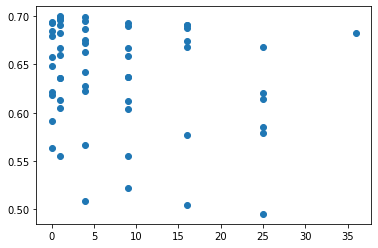

In [ ]:
li = list(zip([1*(number ** 2) for number in egdf['mg_cmet'].tolist()] + [-1*(number ** 2) for number in egdf['ee_cmet'].tolist()], egdf['Easwaran - Gandhi'].tolist()))
plt.scatter(*zip(*li))
plt.show()

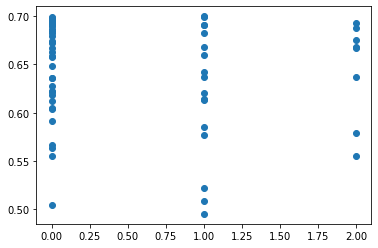

In [ ]:
li = list(zip(egdf['mg_cverb'].tolist()+egdf['ee_cverb'].tolist(), egdf['Easwaran - Gandhi'].tolist()))
plt.scatter(*zip(*li))
plt.show()

In [ ]:
!pip install sentence_transformers &> /dev/null
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
mg_new = egdf['mg_met'].tolist()
ee_new = egdf['ee_met'].tolist()
sp_new = egdf['sp_met'].tolist()

mg_new[0]

array(["['keeping', 'under control', 'engage', 'attachment']"],
      dtype=object)

In [ ]:
mg_new[0][0]

"['keeping', 'under control', 'engage', 'attachment']"

In [ ]:
def get_mlist(newer_list):
  nlist = []
  nnlist = []
  for i in newer_list:
    i = i[0][1:-1]
    words= i.split(',')
    for j in words:
      j = j.replace("'",'')
      nlist.append(j)
  for i in range(len(nlist)):
    if len(nlist[i])>1:
      if nlist[i][0]==' ':
        nnlist.append(nlist[i][1:])
      else:
        nnlist.append(nlist[i])
  return nnlist

In [ ]:
nn_mg = get_mlist(mg_new)
nn_ee = get_mlist(ee_new)
nn_sp = get_mlist(sp_new)

In [ ]:
nn_mg

['keeping',
 'under control',
 'engage',
 'attachment',
 'Together with',
 'Lord',
 'By this',
 'giver',
 'view to',
 'guidance',
 'nature',
 'follow',
 'nature',
 'then',
 'constra',
 'goal',
 'attain',
 'reached',
 'se',
 'sees',
 'attachment',
 'obtain',
 'abandon',
 'fruit',
 'attached to',
 'bound',
 'suffused with That',
 'with That',
 'in That',
 'end',
 'aim',
 'wipe out',
 'possess',
 'free',
 'contact',
 'made',
 'held in',
 'rid',
 'Vital',
 'ce',
 'sustain',
 'proceed from',
 'devo',
 'see',
 'Posses',
 'there through',
 'dispens',
 'steadied',
 'Supreme',
 'freed from',
 'world',
 'down',
 'subject',
 'return',
 'come to',
 'coming',
 'break',
 'this my',
 'might',
 'contain',
 'contain',
 'merge into',
 'end',
 'gives birth to',
 'wheel',
 'going',
 'go to',
 'great',
 'has',
 'settled',
 'finding refuge',
 'womb',
 'reach',
 'goal',
 'with unshak',
 'aspects',
 'Lord',
 'might',
 'issued from',
 'this at great length',
 'part',
 'stand uphold',
 'bear',
 'able form',
 'h

In [ ]:
sum(egdf['mg_cmet'].tolist())

129

In [ ]:
len(nn_mg)

129

In [ ]:
nn_mg_enc = model.encode(nn_mg)
nn_ee_enc = model.encode(nn_ee)
nn_sp_enc = model.encode(nn_sp)

In [ ]:
nn_mg_enc.shape

(129, 768)

In [ ]:
nn_mg_enc[0, :].shape

(768,)

In [ ]:
mgenc_list = []
lol = 0
for i in egdf['mg_cmet'].tolist():
  mgenc_list.append(sum(nn_mg_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
eeenc_list = []
lol = 0 
for i in egdf['ee_cmet'].tolist():
  eeenc_list.append(sum(nn_ee_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
spenc_list = []
lol = 0 
for i in egdf['sp_cmet'].tolist():
  spenc_list.append(sum(nn_sp_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(mgenc_list[0].reshape(1,-1), eeenc_list[0].reshape(1,-1))

array([[0.6029985]], dtype=float32)

In [ ]:
import numpy as np
mg_ee_met_sim = []
ee_sp_met_sim = []
sp_mg_met_sim = []
for i in range(len(mgenc_list)):
  if type(mgenc_list[i])==np.ndarray and type(eeenc_list[i])==np.ndarray:
    mg_ee_met_sim.append(cosine_similarity(mgenc_list[i].reshape(1,-1), eeenc_list[i].reshape(1,-1))[0][0])
  else:
    mg_ee_met_sim.append(0)

for i in range(len(eeenc_list)):
  if type(spenc_list[i])==np.ndarray and type(eeenc_list[i])==np.ndarray:
    ee_sp_met_sim.append(cosine_similarity(spenc_list[i].reshape(1,-1), eeenc_list[i].reshape(1,-1))[0][0])
  else:
    ee_sp_met_sim.append(0)

for i in range(len(mgenc_list)):
  if type(mgenc_list[i])==np.ndarray and type(spenc_list[i])==np.ndarray:
    sp_mg_met_sim.append(cosine_similarity(mgenc_list[i].reshape(1,-1), spenc_list[i].reshape(1,-1))[0][0])
  else:
    sp_mg_met_sim.append(0)

In [ ]:
egdf['mg_ee_met_sim'] = mg_ee_met_sim
egdf['ee_sp_met_sim'] = ee_sp_met_sim
egdf['sp_mg_met_sim'] = sp_mg_met_sim

In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,mg_cmet,...,ee_cverb,ee_met,ee_verb,sp_cmet,sp_cverb,sp_met,sp_verb,mg_ee_met_sim,ee_sp_met_sim,sp_mg_met_sim
0,6.0,3.0,7.0,But they excel who control their senses throug...,"But he, O Arjuna, who keeping all the senses...","But, O Arjuna! All honour to him whose mind c...",0.576629,0.838662,0.531871,4,...,0,"[['control', 'less service']]",[[]],4,1,"[['controls', 'Path', 'keeping', 'unattache']]",[['keeping']],0.602998,0.581857,0.723217
1,9.0,3.0,10.0,"At the beginning, mankind and the obligation o...",Together with sacrifice did the Lord of bein...,"In the beginning, when God created all beings...",0.691054,0.818461,0.718607,4,...,1,"[['together', 'find']]",[['find']],3,0,"[['sacrifice', 'unto', 'Th']]",[[]],0.555879,0.414262,0.564461
2,18.0,3.0,19.0,Strive constantly to serve the welfare of the ...,"Therefore, do you ever perform without attac...","Therefore do your duty perfectly, without car...",0.591221,0.796652,0.624534,0,...,0,"[['serve', 'less', 'goal']]",[[]],0,0,[[]],[[]],0.000000,0.000000,0.000000
3,19.0,3.0,20.0,Do your work with the welfare of others always...,For through action alone Janaka and others ach...,King Janaka and others attained perfection th...,0.695338,0.898263,0.672022,2,...,1,[['followed this path']],[['followed this path']],0,0,[[]],[[]],0.396322,0.000000,0.000000
4,32.0,3.0,33.0,Even the wise act within the limitations of th...,Even a man of knowledge acts according to his ...,Even the wise man acts in character with his ...,0.620646,0.901265,0.663313,5,...,0,"[['s', 'nature', 'pression']]",[[]],1,0,[['then']],[[]],0.689785,0.221738,0.461214
5,41.0,3.0,42.0,"The senses are higher than the body, the mind ...","Subtle, they say, are the senses; subtler th...",It is said that the senses are powerful. But ...,0.657590,0.727049,0.830392,0,...,0,[['higher']],[[]],2,0,"[['powerful', 'greater']]",[[]],0.000000,0.381983,0.000000
6,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497,5,...,1,"[['goal', 'goal', 'see this', 'blind']]",[['see this']],2,1,"[['level', 'reached']]",[['reached']],0.647574,0.423151,0.683892
7,53.0,5.0,11.0,"Renouncing their selfish attachments, those w...","Only with the body, mind and intellect and a...","The sage performs his action dispassionately,...",0.554742,0.638027,0.739116,1,...,2,"[['ncing', 'attachments', 'follow', 'path of',...","[['ncing', 'follow']]",1,0,[['means']],[[]],0.613548,0.348813,0.275273
8,54.0,5.0,12.0,Those whose consciousness is unified abandon ...,A man of yoga obtains everlasting peace by a...,"Having abandoned the fruit of action, he wins...",0.667696,0.720617,0.817349,5,...,1,"[['consciousness', 'ified abandon', 'attachmen...",[['attached to']],7,4,"[['abandon', 'fruit', 'win', 'led', 'clinging ...","[['led', 'clinging to', 'follow', 'tangled in']]",0.850333,0.694408,0.800912
9,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121,6,...,0,"[['cast off', 'through this', 'absorb', 'Lord'...",[[]],5,3,"[['having', 'los', 'dissolved in', 'go where',...","[['having', 'dissolved in', 'go where']]",0.649395,0.661550,0.590549


In [ ]:
x_list = egdf['mg_ee_met_sim'].tolist()
y_list = egdf['Easwaran - Gandhi'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


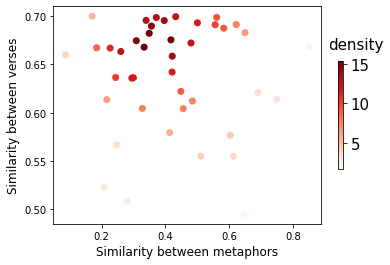

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_ee_mg.png', bbox_inches='tight')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


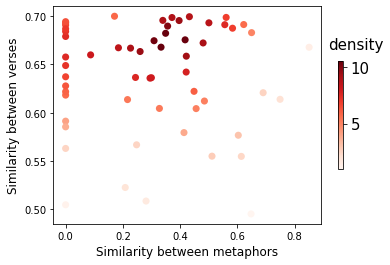

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_ee_mg_0.png', bbox_inches='tight')
plt.show()

In [ ]:
# This plot depicts that having 0 metaphors increases probability of having similar verses,
# and having different metaphors with less cosine similarity doesn't imply that 
# verses similarity will be less.

In [ ]:
x_list = egdf['sp_mg_met_sim'].tolist()
y_list = egdf['Gandhi - Purohit'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


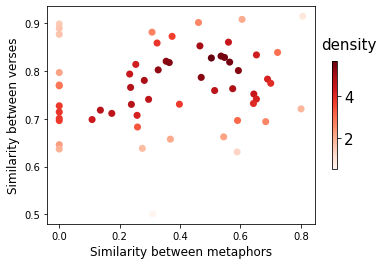

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_mg_sp_0.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


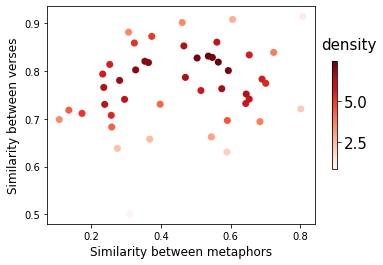

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_mg_sp.png', bbox_inches='tight')
plt.show()

In [ ]:
x_list = egdf['ee_sp_met_sim'].tolist()
y_list = egdf['Purohit - Easwaran'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


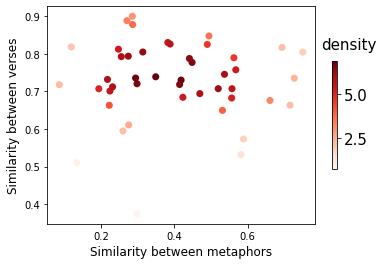

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_sp_ee.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


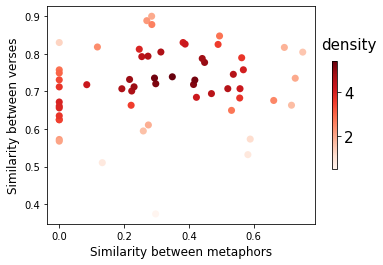

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_sp_ee_0.png', bbox_inches='tight')
plt.show()

In [ ]:
# !zip -r /content/dense_sim_ref.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/sim_plt_mg_sp.png (deflated 3%)
  adding: content/images/sim_plt_ee_mg_0.png (deflated 3%)
  adding: content/images/sim_plt_ee_mg.png (deflated 4%)
  adding: content/images/sim_plt_mg_sp_0.png (deflated 3%)
  adding: content/images/sim_plt_sp_ee.png (deflated 3%)
  adding: content/images/sim_plt_sp_ee_0.png (deflated 3%)


## All verses plot

In [ ]:
!mkdir /content/images

## Gandhi-purohit Least Similar Verses

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

In [ ]:
egdf = pd.read_excel('/content/sentimentanalysis_bhagavadgita/results/semantic analysis/Least Similar Verses/gandhi purohit.xlsx')

In [ ]:
mdf = pd.read_csv('/content/drive/MyDrive/xlmr_mg_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)
edf = pd.read_csv('/content/drive/MyDrive/xlmr_ee_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)
sdf = pd.read_csv('/content/drive/MyDrive/xlmr_sps_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)

In [ ]:
mdf

,chapter,shlok,text,list_metaphors,count_metaphors,refined,verb_refined,count_met_ref,count_verb_ref
0,1,1,"Tell me, O Sanjaya, what my sons and Pandu's...",['on'],1,[],[],0,0
1,1,2,On seeing the Arjuna's army drawn up in batt...,"['On', 'up in']",2,['up in'],[],1,0
2,1,3,"Behold, O preceptor, this mighty army of the...","['hold', 'this mighty', 'set in']",3,"['hold', 'this mighty', 'set in']",['set in'],3,1
3,1,4,"Here are brave bowmen, peers of Bhima and Ar...","['Here', 'pe', 'in']",3,"['Here', 'pe']",[],2,0
4,1,5,"Dhrishtaketu, Chekitana, valorous Kashiraja,...",[],0,[],[],0,0
...,...,...,...,...,...,...,...,...,...
692,18,73,Thus did I hear this marvellous and thrillin...,"['this', 'between', 'great', 'sou']",4,"['great', 'sou']",[],2,0
693,18,74,It was by Vyasa's favor that I listened to t...,"['to this', 'myste', 'expounded']",3,"['to this', 'myste', 'expounded']",['expounded'],3,1
694,18,75,"O King, as often as I recall that marvellous...","['recall that', 'purifying', 'between', 'fille...",5,"['recall that', 'purifying', 'filled with', 'r...","['purifying', 'filled with']",4,2
695,18,76,And as often as I recall that marvellous for...,"['recall that', 'form', 'knows', 'bounds']",4,"['recall that', 'form', 'knows', 'bounds']",[],4,0


In [ ]:
# 3, 5, 7, 8, 9, 10, 11, 12, 15, 16, 17 

In [ ]:
for i in range(1,19):
  print(len(mdf[mdf['chapter']==i]['shlok'].tolist()), len(edf[edf['chapter']==i]['shlok'].tolist()), len(sdf[sdf['chapter']==i]['shlok'].tolist()))

48 47 47
72 71 72
43 43 43
41 42 42
29 29 29
46 47 47
30 30 30
28 28 28
34 34 34
42 42 42
55 55 55
20 20 20
34 34 35
26 27 27
20 20 20
24 24 24
28 28 28
77 78 77


In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,4.0,3.0,5.0,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mome...,He cannot even for a moment remain really ina...,0.796884,0.620986,0.678073
1,5.0,3.0,6.0,Those who abstain from action while allowing t...,He who curbs the organs of action but allows...,"He who remains motionless, refusing to act, b...",0.705354,0.674135,0.651854
2,22.0,3.0,23.0,"If I ever refrained from continuous work, ever...","Indeed, for were I not, unslumbering, ever t...","For were I not to act without ceasing, O prin...",0.832160,0.679311,0.705124
3,37.0,3.0,38.0,Just as a fire is covered by smoke and a mirro...,"As fire is obscured by smoke, a mirror by di...","As fire is shrouded in smoke, a mirror by dus...",0.807268,0.685448,0.781279
4,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497
5,51.0,5.0,9.0,"or speaking, letting go or holding on, even o...","Talking, letting go, holding fast, opening o...","Though he talks, though he gives and receives...",0.701824,0.626344,0.698224
6,53.0,5.0,11.0,"Renouncing their selfish attachments, those w...","Only with the body, mind and intellect and a...","The sage performs his action dispassionately,...",0.554742,0.638027,0.739116
7,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121
8,69.0,5.0,27.0,"Closing their eyes, steadying their breathing...","That ascetic is ever free—who, having shut o...","Excluding external objects, his gaze fixed be...",0.579382,0.682714,0.510459
9,84.0,7.0,13.0,These three gunas deceive the world: people f...,Befogged by these manifestations of the thre...,"The inhabitants of the world, misled by those...",0.868876,0.684443,0.745088


In [ ]:
eg_new = egdf.copy().drop('Unnamed: 0', axis =1)
# eg_new = eg_new[['Chapter', 'Verse', 'Eknath Easwaran', 'Mahatma Gandhi', 'Easwaran - Gandhi']]

In [ ]:
eg_new

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,3.0,5.0,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mome...,He cannot even for a moment remain really ina...,0.796884,0.620986,0.678073
1,3.0,6.0,Those who abstain from action while allowing t...,He who curbs the organs of action but allows...,"He who remains motionless, refusing to act, b...",0.705354,0.674135,0.651854
2,3.0,23.0,"If I ever refrained from continuous work, ever...","Indeed, for were I not, unslumbering, ever t...","For were I not to act without ceasing, O prin...",0.832160,0.679311,0.705124
3,3.0,38.0,Just as a fire is covered by smoke and a mirro...,"As fire is obscured by smoke, a mirror by di...","As fire is shrouded in smoke, a mirror by dus...",0.807268,0.685448,0.781279
4,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497
5,5.0,9.0,"or speaking, letting go or holding on, even o...","Talking, letting go, holding fast, opening o...","Though he talks, though he gives and receives...",0.701824,0.626344,0.698224
6,5.0,11.0,"Renouncing their selfish attachments, those w...","Only with the body, mind and intellect and a...","The sage performs his action dispassionately,...",0.554742,0.638027,0.739116
7,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121
8,5.0,27.0,"Closing their eyes, steadying their breathing...","That ascetic is ever free—who, having shut o...","Excluding external objects, his gaze fixed be...",0.579382,0.682714,0.510459
9,7.0,13.0,These three gunas deceive the world: people f...,Befogged by these manifestations of the thre...,"The inhabitants of the world, misled by those...",0.868876,0.684443,0.745088


In [ ]:
mg_cmet_list = []
ee_cmet_list = []
sp_cmet_list = []
mg_cverb_list = []
ee_cverb_list = []
sp_cverb_list = []
mg_text = []
mg_vbtext = []
ee_text = []
ee_vbtext = []
sp_text = []
sp_vbtext = []

chap_list = eg_new['Chapter'].tolist()
verse_list = eg_new['Verse'].tolist()
for i in range(len(chap_list)):
  cno = int(chap_list[i])
  vno = int(verse_list[i])

  mg_cmet_list.append(int(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['count_met_ref'].values))
  ee_cmet_list.append(int(edf[edf['chapter']==cno][edf['shlok']==vno]['count_met_ref'].values))
  sp_cmet_list.append(int(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['count_met_ref'].values))

  mg_cverb_list.append(int(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['count_verb_ref'].values))
  ee_cverb_list.append(int(edf[edf['chapter']==cno][edf['shlok']==vno]['count_verb_ref'].values))
  sp_cverb_list.append(int(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['count_verb_ref'].values))

  mg_text.append(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['refined'].values)
  ee_text.append(edf[edf['chapter']==cno][edf['shlok']==vno]['refined'].values)
  sp_text.append(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['refined'].values)

  mg_vbtext.append(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['verb_refined'].values)
  ee_vbtext.append(edf[edf['chapter']==cno][edf['shlok']==vno]['verb_refined'].values)
  sp_vbtext.append(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['verb_refined'].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/li

In [ ]:
egdf['mg_cmet'] = mg_cmet_list
egdf['mg_cverb'] = mg_cverb_list
egdf['mg_met'] = mg_text
egdf['mg_verb'] = mg_vbtext

egdf['ee_cmet'] = ee_cmet_list
egdf['ee_cverb'] = ee_cverb_list
egdf['ee_met'] = ee_text
egdf['ee_verb'] = ee_vbtext

egdf['sp_cmet'] = sp_cmet_list
egdf['sp_cverb'] = sp_cverb_list
egdf['sp_met'] = sp_text
egdf['sp_verb'] = sp_vbtext

In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,mg_cmet,...,mg_met,mg_verb,ee_cmet,ee_cverb,ee_met,ee_verb,sp_cmet,sp_cverb,sp_met,sp_verb
0,4.0,3.0,5.0,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mome...,He cannot even for a moment remain really ina...,0.796884,0.620986,0.678073,2,...,"[['compelle', 's']]",[[]],3,1,"[['rest', 'driven to', 'nature']]",[['driven to']],1,0,[['compel']],[[]]
1,5.0,3.0,6.0,Those who abstain from action while allowing t...,He who curbs the organs of action but allows...,"He who remains motionless, refusing to act, b...",0.705354,0.674135,0.651854,4,...,"[['cur', 'allows', 'dwell on', 'object']]",[[]],2,0,"[['dwell on', 'nts']]",[[]],2,1,"[['ous', 'ded']]",[['ded']]
2,22.0,3.0,23.0,"If I ever refrained from continuous work, ever...","Indeed, for were I not, unslumbering, ever t...","For were I not to act without ceasing, O prin...",0.832160,0.679311,0.705124,2,...,"[['follow', 'way']]",[['follow']],2,1,"[['from continuo', 'follow']]",[['follow']],0,0,[[]],[[]]
3,37.0,3.0,38.0,Just as a fire is covered by smoke and a mirro...,"As fire is obscured by smoke, a mirror by di...","As fire is shrouded in smoke, a mirror by dus...",0.807268,0.685448,0.781279,2,...,"[['obscur', 'obscured']]",[['obscured']],1,0,[['hidden']],[[]],2,1,"[['shrou', 'enveloped in']]",[['enveloped in']]
4,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497,5,...,"[['goal', 'attain', 'reached', 'se', 'sees']]",[['reached']],4,1,"[['goal', 'goal', 'see this', 'blind']]",[['see this']],2,1,"[['level', 'reached']]",[['reached']]
5,51.0,5.0,9.0,"or speaking, letting go or holding on, even o...","Talking, letting go, holding fast, opening o...","Though he talks, though he gives and receives...",0.701824,0.626344,0.698224,1,...,[['sphere']],[[]],0,0,[[]],[[]],2,1,"[['disporting', 'objects']]",[['disporting']]
6,53.0,5.0,11.0,"Renouncing their selfish attachments, those w...","Only with the body, mind and intellect and a...","The sage performs his action dispassionately,...",0.554742,0.638027,0.739116,1,...,[['attachment']],[[]],5,2,"[['ncing', 'attachments', 'follow', 'path of',...","[['ncing', 'follow']]",1,0,[['means']],[[]]
7,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121,6,...,"[['suffused with That', 'with That', 'in That'...",[['suffused with That']],6,0,"[['cast off', 'through this', 'absorb', 'Lord'...",[[]],5,3,"[['having', 'los', 'dissolved in', 'go where',...","[['having', 'dissolved in', 'go where']]"
8,69.0,5.0,27.0,"Closing their eyes, steadying their breathing...","That ascetic is ever free—who, having shut o...","Excluding external objects, his gaze fixed be...",0.579382,0.682714,0.510459,5,...,"[['free', 'contact', 'made', 'held in', 'rid']]","[['made', 'held in']]",2,0,"[['steady', 'center']]",[[]],1,0,[['pas']],[[]]
9,84.0,7.0,13.0,These three gunas deceive the world: people f...,Befogged by these manifestations of the thre...,"The inhabitants of the world, misled by those...",0.868876,0.684443,0.745088,5,...,"[['Befogged', 'guna', 'fail', 'recognize', 'tr...","[['Befogged', 'recognize']]",3,0,"[['guna', 'deceive', 'look beyond']]",[[]],3,1,"[['misled', 'higher', 'change']]",[['misled']]


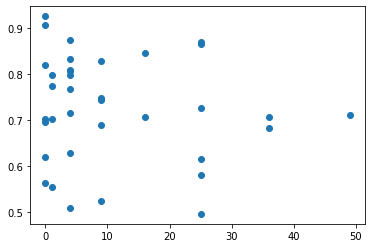

In [ ]:
li = list(zip([1*(number ** 2) for number in egdf['mg_cmet'].tolist()] + [-1*(number ** 2) for number in egdf['ee_cmet'].tolist()], egdf['Easwaran - Gandhi'].tolist()))
plt.scatter(*zip(*li))
plt.show()

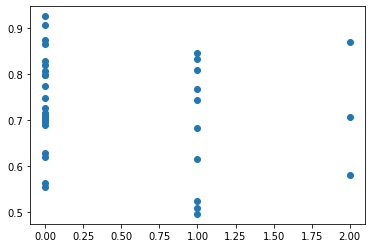

In [ ]:
li = list(zip(egdf['mg_cverb'].tolist()+egdf['ee_cverb'].tolist(), egdf['Easwaran - Gandhi'].tolist()))
plt.scatter(*zip(*li))
plt.show()

In [ ]:
!pip install sentence_transformers &> /dev/null
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
mg_new = egdf['mg_met'].tolist()
ee_new = egdf['ee_met'].tolist()
sp_new = egdf['sp_met'].tolist()

mg_new[0]

array(["['compelle', 's']"], dtype=object)

In [ ]:
mg_new[0][0]

"['compelle', 's']"

In [ ]:
def get_mlist(newer_list):
  nlist = []
  nnlist = []
  for i in newer_list:
    i = i[0][1:-1]
    words= i.split(',')
    for j in words:
      j = j.replace("'",'')
      nlist.append(j)
  for i in range(len(nlist)):
    if len(nlist[i])>1:
      if nlist[i][0]==' ':
        nnlist.append(nlist[i][1:])
      else:
        nnlist.append(nlist[i])
  return nnlist

In [ ]:
nn_mg = get_mlist(mg_new)
nn_ee = get_mlist(ee_new)
nn_sp = get_mlist(sp_new)

In [ ]:
nn_mg

['compelle',
 's',
 'cur',
 'allows',
 'dwell on',
 'object',
 'follow',
 'way',
 'obscur',
 'obscured',
 'goal',
 'attain',
 'reached',
 'se',
 'sees',
 'sphere',
 'attachment',
 'suffused with That',
 'with That',
 'in That',
 'end',
 'aim',
 'wipe out',
 'free',
 'contact',
 'made',
 'held in',
 'rid',
 'Befogged',
 'guna',
 'fail',
 'recognize',
 'transcend',
 'devo',
 'see',
 'virtu',
 'sprung from',
 'possess',
 'with unwavering',
 'fix',
 'power',
 'sun beyond',
 'goes to that Supreme',
 'ing',
 'uttering',
 'reach',
 'highest state',
 'might',
 'contain',
 'contain',
 'Resort',
 'sway',
 'released from',
 'bondage',
 'yiel',
 'evil fruit',
 'ting',
 'less',
 'dwell in',
 'dark',
 'born',
 're',
 'gent lamp',
 'end to',
 'extent',
 'way',
 'this at great length',
 'part',
 'stand uphold',
 'reveal',
 'having',
 'sense',
 'objects',
 'deep down in',
 'roots',
 'form',
 'here percei',
 'end',
 'hew down this deep',
 'root',
 'sure weapon',
 'detachment',
 'part',
 'Vital Essence',

In [ ]:
sum(egdf['mg_cmet'].tolist())

94

In [ ]:
len(nn_mg)

94

In [ ]:
nn_mg_enc = model.encode(nn_mg)
nn_ee_enc = model.encode(nn_ee)
nn_sp_enc = model.encode(nn_sp)

In [ ]:
nn_mg_enc.shape

(94, 768)

In [ ]:
nn_mg_enc[0, :].shape

(768,)

In [ ]:
mgenc_list = []
lol = 0
for i in egdf['mg_cmet'].tolist():
  mgenc_list.append(sum(nn_mg_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
eeenc_list = []
lol = 0 
for i in egdf['ee_cmet'].tolist():
  eeenc_list.append(sum(nn_ee_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
spenc_list = []
lol = 0 
for i in egdf['sp_cmet'].tolist():
  spenc_list.append(sum(nn_sp_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(mgenc_list[0].reshape(1,-1), eeenc_list[0].reshape(1,-1))

array([[0.32784042]], dtype=float32)

In [ ]:
import numpy as np
mg_ee_met_sim = []
ee_sp_met_sim = []
sp_mg_met_sim = []
for i in range(len(mgenc_list)):
  if type(mgenc_list[i])==np.ndarray and type(eeenc_list[i])==np.ndarray:
    mg_ee_met_sim.append(cosine_similarity(mgenc_list[i].reshape(1,-1), eeenc_list[i].reshape(1,-1))[0][0])
  else:
    mg_ee_met_sim.append(0)

for i in range(len(eeenc_list)):
  if type(spenc_list[i])==np.ndarray and type(eeenc_list[i])==np.ndarray:
    ee_sp_met_sim.append(cosine_similarity(spenc_list[i].reshape(1,-1), eeenc_list[i].reshape(1,-1))[0][0])
  else:
    ee_sp_met_sim.append(0)

for i in range(len(mgenc_list)):
  if type(mgenc_list[i])==np.ndarray and type(spenc_list[i])==np.ndarray:
    sp_mg_met_sim.append(cosine_similarity(mgenc_list[i].reshape(1,-1), spenc_list[i].reshape(1,-1))[0][0])
  else:
    sp_mg_met_sim.append(0)

In [ ]:
egdf['mg_ee_met_sim'] = mg_ee_met_sim
egdf['ee_sp_met_sim'] = ee_sp_met_sim
egdf['sp_mg_met_sim'] = sp_mg_met_sim

In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,mg_cmet,...,ee_cverb,ee_met,ee_verb,sp_cmet,sp_cverb,sp_met,sp_verb,mg_ee_met_sim,ee_sp_met_sim,sp_mg_met_sim
0,4.0,3.0,5.0,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mome...,He cannot even for a moment remain really ina...,0.796884,0.620986,0.678073,2,...,1,"[['rest', 'driven to', 'nature']]",[['driven to']],1,0,[['compel']],[[]],0.327840,0.285063,0.727761
1,5.0,3.0,6.0,Those who abstain from action while allowing t...,He who curbs the organs of action but allows...,"He who remains motionless, refusing to act, b...",0.705354,0.674135,0.651854,4,...,0,"[['dwell on', 'nts']]",[[]],2,1,"[['ous', 'ded']]",[['ded']],0.638999,0.473927,0.448775
2,22.0,3.0,23.0,"If I ever refrained from continuous work, ever...","Indeed, for were I not, unslumbering, ever t...","For were I not to act without ceasing, O prin...",0.832160,0.679311,0.705124,2,...,1,"[['from continuo', 'follow']]",[['follow']],0,0,[[]],[[]],0.654101,0.000000,0.000000
3,37.0,3.0,38.0,Just as a fire is covered by smoke and a mirro...,"As fire is obscured by smoke, a mirror by di...","As fire is shrouded in smoke, a mirror by dus...",0.807268,0.685448,0.781279,2,...,0,[['hidden']],[[]],2,1,"[['shrou', 'enveloped in']]",[['enveloped in']],0.578266,0.338434,0.482167
4,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497,5,...,1,"[['goal', 'goal', 'see this', 'blind']]",[['see this']],2,1,"[['level', 'reached']]",[['reached']],0.679643,0.421664,0.683892
5,51.0,5.0,9.0,"or speaking, letting go or holding on, even o...","Talking, letting go, holding fast, opening o...","Though he talks, though he gives and receives...",0.701824,0.626344,0.698224,1,...,0,[[]],[[]],2,1,"[['disporting', 'objects']]",[['disporting']],0.000000,0.000000,0.442145
6,53.0,5.0,11.0,"Renouncing their selfish attachments, those w...","Only with the body, mind and intellect and a...","The sage performs his action dispassionately,...",0.554742,0.638027,0.739116,1,...,2,"[['ncing', 'attachments', 'follow', 'path of',...","[['ncing', 'follow']]",1,0,[['means']],[[]],0.606546,0.301601,0.275273
7,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121,6,...,0,"[['cast off', 'through this', 'absorb', 'Lord'...",[[]],5,3,"[['having', 'los', 'dissolved in', 'go where',...","[['having', 'dissolved in', 'go where']]",0.646206,0.630216,0.590549
8,69.0,5.0,27.0,"Closing their eyes, steadying their breathing...","That ascetic is ever free—who, having shut o...","Excluding external objects, his gaze fixed be...",0.579382,0.682714,0.510459,5,...,0,"[['steady', 'center']]",[[]],1,0,[['pas']],[[]],0.444917,0.112697,0.259188
9,84.0,7.0,13.0,These three gunas deceive the world: people f...,Befogged by these manifestations of the thre...,"The inhabitants of the world, misled by those...",0.868876,0.684443,0.745088,5,...,0,"[['guna', 'deceive', 'look beyond']]",[[]],3,1,"[['misled', 'higher', 'change']]",[['misled']],0.738374,0.532102,0.534212


In [ ]:
x_list = egdf['mg_ee_met_sim'].tolist()
y_list = egdf['Easwaran - Gandhi'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


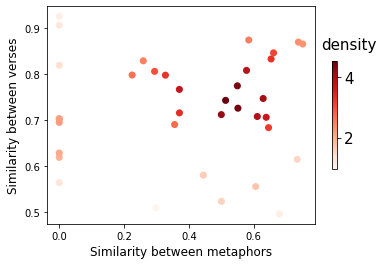

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_ee_mg_0.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


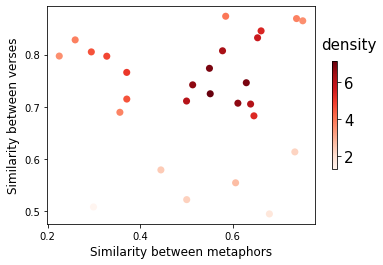

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_ee_mg.png', bbox_inches='tight')
plt.show()


In [ ]:
# This plot depicts that having 0 metaphors increases probability of having similar verses,
# and having different metaphors with less cosine similarity doesn't imply that 
# verses similarity will be less.

In [ ]:
x_list = egdf['sp_mg_met_sim'].tolist()
y_list = egdf['Gandhi - Purohit'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


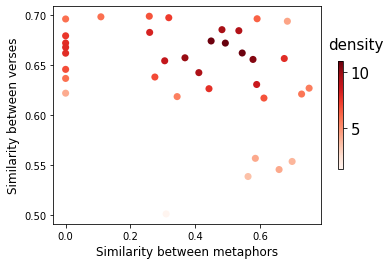

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_mg_sp_0.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


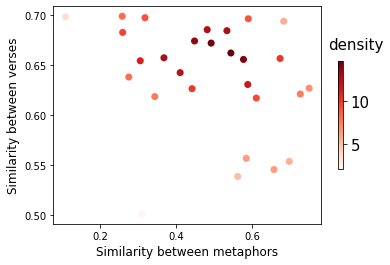

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_mg_sp.png', bbox_inches='tight')
plt.show()

In [ ]:
x_list = egdf['ee_sp_met_sim'].tolist()
y_list = egdf['Purohit - Easwaran'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


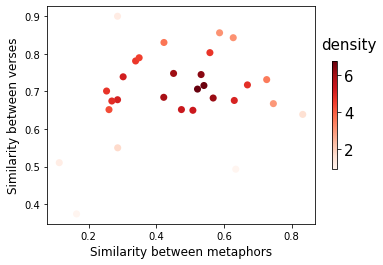

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_sp_ee.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


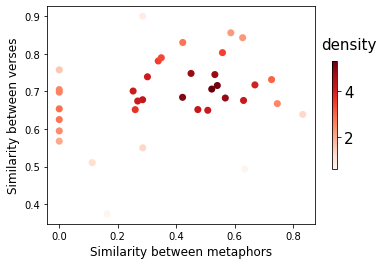

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_sp_ee_0.png', bbox_inches='tight')
plt.show()

In [ ]:
# !zip -r /content/dense_sim_ref.zip /content/images

## Purohit- Easwaran Least Similar Verses

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

In [ ]:
egdf = pd.read_excel('/content/sentimentanalysis_bhagavadgita/results/semantic analysis/Least Similar Verses/purohit easwaran.xlsx')

In [ ]:
mdf = pd.read_csv('/content/drive/MyDrive/xlmr_mg_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)
edf = pd.read_csv('/content/drive/MyDrive/xlmr_ee_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)
sdf = pd.read_csv('/content/drive/MyDrive/xlmr_sps_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)

In [ ]:
mdf

,chapter,shlok,text,list_metaphors,count_metaphors,refined,verb_refined,count_met_ref,count_verb_ref
0,1,1,"Tell me, O Sanjaya, what my sons and Pandu's...",['on'],1,[],[],0,0
1,1,2,On seeing the Arjuna's army drawn up in batt...,"['On', 'up in']",2,['up in'],[],1,0
2,1,3,"Behold, O preceptor, this mighty army of the...","['hold', 'this mighty', 'set in']",3,"['hold', 'this mighty', 'set in']",['set in'],3,1
3,1,4,"Here are brave bowmen, peers of Bhima and Ar...","['Here', 'pe', 'in']",3,"['Here', 'pe']",[],2,0
4,1,5,"Dhrishtaketu, Chekitana, valorous Kashiraja,...",[],0,[],[],0,0
...,...,...,...,...,...,...,...,...,...
692,18,73,Thus did I hear this marvellous and thrillin...,"['this', 'between', 'great', 'sou']",4,"['great', 'sou']",[],2,0
693,18,74,It was by Vyasa's favor that I listened to t...,"['to this', 'myste', 'expounded']",3,"['to this', 'myste', 'expounded']",['expounded'],3,1
694,18,75,"O King, as often as I recall that marvellous...","['recall that', 'purifying', 'between', 'fille...",5,"['recall that', 'purifying', 'filled with', 'r...","['purifying', 'filled with']",4,2
695,18,76,And as often as I recall that marvellous for...,"['recall that', 'form', 'knows', 'bounds']",4,"['recall that', 'form', 'knows', 'bounds']",[],4,0


In [ ]:
# 3, 5, 7, 8, 9, 10, 11, 12, 15, 16, 17 

In [ ]:
for i in range(1,19):
  print(len(mdf[mdf['chapter']==i]['shlok'].tolist()), len(edf[edf['chapter']==i]['shlok'].tolist()), len(sdf[sdf['chapter']==i]['shlok'].tolist()))

48 47 47
72 71 72
43 43 43
41 42 42
29 29 29
46 47 47
30 30 30
28 28 28
34 34 34
42 42 42
55 55 55
20 20 20
34 34 35
26 27 27
20 20 20
24 24 24
28 28 28
77 78 77


In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,4.0,3.0,5.0,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mome...,He cannot even for a moment remain really ina...,0.796884,0.620986,0.678073
1,5.0,3.0,6.0,Those who abstain from action while allowing t...,He who curbs the organs of action but allows...,"He who remains motionless, refusing to act, b...",0.705354,0.674135,0.651854
2,6.0,3.0,7.0,But they excel who control their senses throug...,"But he, O Arjuna, who keeping all the senses...","But, O Arjuna! All honour to him whose mind c...",0.576629,0.838662,0.531871
3,18.0,3.0,19.0,Strive constantly to serve the welfare of the ...,"Therefore, do you ever perform without attac...","Therefore do your duty perfectly, without car...",0.591221,0.796652,0.624534
4,19.0,3.0,20.0,Do your work with the welfare of others always...,For through action alone Janaka and others ach...,King Janaka and others attained perfection th...,0.695338,0.898263,0.672022
5,32.0,3.0,33.0,Even the wise act within the limitations of th...,Even a man of knowledge acts according to his ...,Even the wise man acts in character with his ...,0.620646,0.901265,0.663313
6,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497
7,51.0,5.0,9.0,"or speaking, letting go or holding on, even o...","Talking, letting go, holding fast, opening o...","Though he talks, though he gives and receives...",0.701824,0.626344,0.698224
8,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121
9,69.0,5.0,27.0,"Closing their eyes, steadying their breathing...","That ascetic is ever free—who, having shut o...","Excluding external objects, his gaze fixed be...",0.579382,0.682714,0.510459


In [ ]:
eg_new = egdf.copy().drop('Unnamed: 0', axis =1)
# eg_new = eg_new[['Chapter', 'Verse', 'Eknath Easwaran', 'Mahatma Gandhi', 'Easwaran - Gandhi']]

In [ ]:
eg_new

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,3.0,5.0,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mome...,He cannot even for a moment remain really ina...,0.796884,0.620986,0.678073
1,3.0,6.0,Those who abstain from action while allowing t...,He who curbs the organs of action but allows...,"He who remains motionless, refusing to act, b...",0.705354,0.674135,0.651854
2,3.0,7.0,But they excel who control their senses throug...,"But he, O Arjuna, who keeping all the senses...","But, O Arjuna! All honour to him whose mind c...",0.576629,0.838662,0.531871
3,3.0,19.0,Strive constantly to serve the welfare of the ...,"Therefore, do you ever perform without attac...","Therefore do your duty perfectly, without car...",0.591221,0.796652,0.624534
4,3.0,20.0,Do your work with the welfare of others always...,For through action alone Janaka and others ach...,King Janaka and others attained perfection th...,0.695338,0.898263,0.672022
5,3.0,33.0,Even the wise act within the limitations of th...,Even a man of knowledge acts according to his ...,Even the wise man acts in character with his ...,0.620646,0.901265,0.663313
6,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497
7,5.0,9.0,"or speaking, letting go or holding on, even o...","Talking, letting go, holding fast, opening o...","Though he talks, though he gives and receives...",0.701824,0.626344,0.698224
8,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121
9,5.0,27.0,"Closing their eyes, steadying their breathing...","That ascetic is ever free—who, having shut o...","Excluding external objects, his gaze fixed be...",0.579382,0.682714,0.510459


In [ ]:
mg_cmet_list = []
ee_cmet_list = []
sp_cmet_list = []
mg_cverb_list = []
ee_cverb_list = []
sp_cverb_list = []
mg_text = []
mg_vbtext = []
ee_text = []
ee_vbtext = []
sp_text = []
sp_vbtext = []

chap_list = eg_new['Chapter'].tolist()
verse_list = eg_new['Verse'].tolist()
for i in range(len(chap_list)):
  cno = int(chap_list[i])
  vno = int(verse_list[i])

  mg_cmet_list.append(int(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['count_met_ref'].values))
  ee_cmet_list.append(int(edf[edf['chapter']==cno][edf['shlok']==vno]['count_met_ref'].values))
  sp_cmet_list.append(int(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['count_met_ref'].values))

  mg_cverb_list.append(int(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['count_verb_ref'].values))
  ee_cverb_list.append(int(edf[edf['chapter']==cno][edf['shlok']==vno]['count_verb_ref'].values))
  sp_cverb_list.append(int(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['count_verb_ref'].values))

  mg_text.append(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['refined'].values)
  ee_text.append(edf[edf['chapter']==cno][edf['shlok']==vno]['refined'].values)
  sp_text.append(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['refined'].values)

  mg_vbtext.append(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['verb_refined'].values)
  ee_vbtext.append(edf[edf['chapter']==cno][edf['shlok']==vno]['verb_refined'].values)
  sp_vbtext.append(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['verb_refined'].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/li

In [ ]:
egdf['mg_cmet'] = mg_cmet_list
egdf['mg_cverb'] = mg_cverb_list
egdf['mg_met'] = mg_text
egdf['mg_verb'] = mg_vbtext

egdf['ee_cmet'] = ee_cmet_list
egdf['ee_cverb'] = ee_cverb_list
egdf['ee_met'] = ee_text
egdf['ee_verb'] = ee_vbtext

egdf['sp_cmet'] = sp_cmet_list
egdf['sp_cverb'] = sp_cverb_list
egdf['sp_met'] = sp_text
egdf['sp_verb'] = sp_vbtext

In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,mg_cmet,...,mg_met,mg_verb,ee_cmet,ee_cverb,ee_met,ee_verb,sp_cmet,sp_cverb,sp_met,sp_verb
0,4.0,3.0,5.0,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mome...,He cannot even for a moment remain really ina...,0.796884,0.620986,0.678073,2,...,"[['compelle', 's']]",[[]],3,1,"[['rest', 'driven to', 'nature']]",[['driven to']],1,0,[['compel']],[[]]
1,5.0,3.0,6.0,Those who abstain from action while allowing t...,He who curbs the organs of action but allows...,"He who remains motionless, refusing to act, b...",0.705354,0.674135,0.651854,4,...,"[['cur', 'allows', 'dwell on', 'object']]",[[]],2,0,"[['dwell on', 'nts']]",[[]],2,1,"[['ous', 'ded']]",[['ded']]
2,6.0,3.0,7.0,But they excel who control their senses throug...,"But he, O Arjuna, who keeping all the senses...","But, O Arjuna! All honour to him whose mind c...",0.576629,0.838662,0.531871,4,...,"[['keeping', 'under control', 'engage', 'attac...",[['keeping']],2,0,"[['control', 'less service']]",[[]],4,1,"[['controls', 'Path', 'keeping', 'unattache']]",[['keeping']]
3,18.0,3.0,19.0,Strive constantly to serve the welfare of the ...,"Therefore, do you ever perform without attac...","Therefore do your duty perfectly, without car...",0.591221,0.796652,0.624534,0,...,[[]],[[]],3,0,"[['serve', 'less', 'goal']]",[[]],0,0,[[]],[[]]
4,19.0,3.0,20.0,Do your work with the welfare of others always...,For through action alone Janaka and others ach...,King Janaka and others attained perfection th...,0.695338,0.898263,0.672022,2,...,"[['view to', 'guidance']]",[[]],1,1,[['followed this path']],[['followed this path']],0,0,[[]],[[]]
5,32.0,3.0,33.0,Even the wise act within the limitations of th...,Even a man of knowledge acts according to his ...,Even the wise man acts in character with his ...,0.620646,0.901265,0.663313,5,...,"[['nature', 'follow', 'nature', 'then', 'const...",[['follow']],3,0,"[['s', 'nature', 'pression']]",[[]],1,0,[['then']],[[]]
6,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497,5,...,"[['goal', 'attain', 'reached', 'se', 'sees']]",[['reached']],4,1,"[['goal', 'goal', 'see this', 'blind']]",[['see this']],2,1,"[['level', 'reached']]",[['reached']]
7,51.0,5.0,9.0,"or speaking, letting go or holding on, even o...","Talking, letting go, holding fast, opening o...","Though he talks, though he gives and receives...",0.701824,0.626344,0.698224,1,...,[['sphere']],[[]],0,0,[[]],[[]],2,1,"[['disporting', 'objects']]",[['disporting']]
8,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121,6,...,"[['suffused with That', 'with That', 'in That'...",[['suffused with That']],6,0,"[['cast off', 'through this', 'absorb', 'Lord'...",[[]],5,3,"[['having', 'los', 'dissolved in', 'go where',...","[['having', 'dissolved in', 'go where']]"
9,69.0,5.0,27.0,"Closing their eyes, steadying their breathing...","That ascetic is ever free—who, having shut o...","Excluding external objects, his gaze fixed be...",0.579382,0.682714,0.510459,5,...,"[['free', 'contact', 'made', 'held in', 'rid']]","[['made', 'held in']]",2,0,"[['steady', 'center']]",[[]],1,0,[['pas']],[[]]


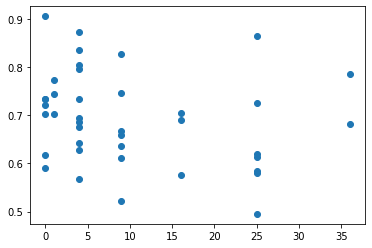

In [ ]:
li = list(zip([1*(number ** 2) for number in egdf['mg_cmet'].tolist()] + [-1*(number ** 2) for number in egdf['ee_cmet'].tolist()], egdf['Easwaran - Gandhi'].tolist()))
plt.scatter(*zip(*li))
plt.show()

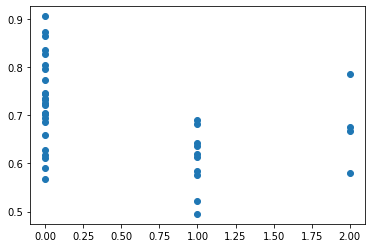

In [ ]:
li = list(zip(egdf['mg_cverb'].tolist()+egdf['ee_cverb'].tolist(), egdf['Easwaran - Gandhi'].tolist()))
plt.scatter(*zip(*li))
plt.show()

In [ ]:
!pip install sentence_transformers &> /dev/null
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
mg_new = egdf['mg_met'].tolist()
ee_new = egdf['ee_met'].tolist()
sp_new = egdf['sp_met'].tolist()

mg_new[0]

array(["['compelle', 's']"], dtype=object)

In [ ]:
mg_new[0][0]

"['compelle', 's']"

In [ ]:
def get_mlist(newer_list):
  nlist = []
  nnlist = []
  for i in newer_list:
    i = i[0][1:-1]
    words= i.split(',')
    for j in words:
      j = j.replace("'",'')
      nlist.append(j)
  for i in range(len(nlist)):
    if len(nlist[i])>1:
      if nlist[i][0]==' ':
        nnlist.append(nlist[i][1:])
      else:
        nnlist.append(nlist[i])
  return nnlist

In [ ]:
nn_mg = get_mlist(mg_new)
nn_ee = get_mlist(ee_new)
nn_sp = get_mlist(sp_new)

In [ ]:
nn_mg

['compelle',
 's',
 'cur',
 'allows',
 'dwell on',
 'object',
 'keeping',
 'under control',
 'engage',
 'attachment',
 'view to',
 'guidance',
 'nature',
 'follow',
 'nature',
 'then',
 'constra',
 'goal',
 'attain',
 'reached',
 'se',
 'sees',
 'sphere',
 'suffused with That',
 'with That',
 'in That',
 'end',
 'aim',
 'wipe out',
 'free',
 'contact',
 'made',
 'held in',
 'rid',
 'Vital',
 'ce',
 'sustain',
 'made up',
 'hard',
 'pierce',
 'make',
 'refuge pierce',
 'veil',
 'Posses',
 'there through',
 'dispens',
 'virtu',
 'sprung from',
 'come to',
 'coming',
 'break',
 'bright',
 'em',
 'paths falls',
 'might',
 'contain',
 'contain',
 'merge into',
 'end',
 'great',
 'has',
 'settled',
 'finding refuge',
 'womb',
 'reach',
 'goal',
 'attributes',
 'proceed',
 'dwell in',
 'dark',
 'born',
 're',
 'gent lamp',
 'end to',
 'extent',
 'way',
 'might',
 'issued from',
 'reveal',
 'Rock',
 'seated',
 'Greater',
 'fixed on',
 'hard',
 'gain',
 'Goal',
 'set',
 'rest',
 'having',
 'sen

In [ ]:
sum(egdf['mg_cmet'].tolist())

105

In [ ]:
len(nn_mg)

105

In [ ]:
nn_mg_enc = model.encode(nn_mg)
nn_ee_enc = model.encode(nn_ee)
nn_sp_enc = model.encode(nn_sp)

In [ ]:
nn_mg_enc.shape

(105, 768)

In [ ]:
nn_mg_enc[0, :].shape

(768,)

In [ ]:
mgenc_list = []
lol = 0
for i in egdf['mg_cmet'].tolist():
  mgenc_list.append(sum(nn_mg_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
eeenc_list = []
lol = 0 
for i in egdf['ee_cmet'].tolist():
  eeenc_list.append(sum(nn_ee_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
spenc_list = []
lol = 0 
for i in egdf['sp_cmet'].tolist():
  spenc_list.append(sum(nn_sp_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(mgenc_list[0].reshape(1,-1), eeenc_list[0].reshape(1,-1))

array([[0.32784048]], dtype=float32)

In [ ]:
import numpy as np
mg_ee_met_sim = []
ee_sp_met_sim = []
sp_mg_met_sim = []
for i in range(len(mgenc_list)):
  if type(mgenc_list[i])==np.ndarray and type(eeenc_list[i])==np.ndarray:
    mg_ee_met_sim.append(cosine_similarity(mgenc_list[i].reshape(1,-1), eeenc_list[i].reshape(1,-1))[0][0])
  else:
    mg_ee_met_sim.append(0)

for i in range(len(eeenc_list)):
  if type(spenc_list[i])==np.ndarray and type(eeenc_list[i])==np.ndarray:
    ee_sp_met_sim.append(cosine_similarity(spenc_list[i].reshape(1,-1), eeenc_list[i].reshape(1,-1))[0][0])
  else:
    ee_sp_met_sim.append(0)

for i in range(len(mgenc_list)):
  if type(mgenc_list[i])==np.ndarray and type(spenc_list[i])==np.ndarray:
    sp_mg_met_sim.append(cosine_similarity(mgenc_list[i].reshape(1,-1), spenc_list[i].reshape(1,-1))[0][0])
  else:
    sp_mg_met_sim.append(0)

In [ ]:
egdf['mg_ee_met_sim'] = mg_ee_met_sim
egdf['ee_sp_met_sim'] = ee_sp_met_sim
egdf['sp_mg_met_sim'] = sp_mg_met_sim

In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,mg_cmet,...,ee_cverb,ee_met,ee_verb,sp_cmet,sp_cverb,sp_met,sp_verb,mg_ee_met_sim,ee_sp_met_sim,sp_mg_met_sim
0,4.0,3.0,5.0,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mome...,He cannot even for a moment remain really ina...,0.796884,0.620986,0.678073,2,...,1,"[['rest', 'driven to', 'nature']]",[['driven to']],1,0,[['compel']],[[]],0.327840,0.285063,0.727761
1,5.0,3.0,6.0,Those who abstain from action while allowing t...,He who curbs the organs of action but allows...,"He who remains motionless, refusing to act, b...",0.705354,0.674135,0.651854,4,...,0,"[['dwell on', 'nts']]",[[]],2,1,"[['ous', 'ded']]",[['ded']],0.638999,0.473927,0.448775
2,6.0,3.0,7.0,But they excel who control their senses throug...,"But he, O Arjuna, who keeping all the senses...","But, O Arjuna! All honour to him whose mind c...",0.576629,0.838662,0.531871,4,...,0,"[['control', 'less service']]",[[]],4,1,"[['controls', 'Path', 'keeping', 'unattache']]",[['keeping']],0.602998,0.581857,0.723217
3,18.0,3.0,19.0,Strive constantly to serve the welfare of the ...,"Therefore, do you ever perform without attac...","Therefore do your duty perfectly, without car...",0.591221,0.796652,0.624534,0,...,0,"[['serve', 'less', 'goal']]",[[]],0,0,[[]],[[]],0.000000,0.000000,0.000000
4,19.0,3.0,20.0,Do your work with the welfare of others always...,For through action alone Janaka and others ach...,King Janaka and others attained perfection th...,0.695338,0.898263,0.672022,2,...,1,[['followed this path']],[['followed this path']],0,0,[[]],[[]],0.396322,0.000000,0.000000
5,32.0,3.0,33.0,Even the wise act within the limitations of th...,Even a man of knowledge acts according to his ...,Even the wise man acts in character with his ...,0.620646,0.901265,0.663313,5,...,0,"[['s', 'nature', 'pression']]",[[]],1,0,[['then']],[[]],0.696880,0.170434,0.461214
6,47.0,5.0,5.0,The goal of knowledge and the goal of service ...,The goal that the sankhyas attain is also reac...,The level which is reached by wisdom is attai...,0.495198,0.693896,0.684497,5,...,1,"[['goal', 'goal', 'see this', 'blind']]",[['see this']],2,1,"[['level', 'reached']]",[['reached']],0.611160,0.392222,0.683892
7,51.0,5.0,9.0,"or speaking, letting go or holding on, even o...","Talking, letting go, holding fast, opening o...","Though he talks, though he gives and receives...",0.701824,0.626344,0.698224,1,...,0,[[]],[[]],2,1,"[['disporting', 'objects']]",[['disporting']],0.000000,0.000000,0.442145
8,59.0,5.0,17.0,Those who cast off sin through this knowledge...,"Those whose intellect is suffused with That,...","Meditating on the Divine, having faith in the...",0.682827,0.696380,0.676121,6,...,0,"[['cast off', 'through this', 'absorb', 'Lord'...",[[]],5,3,"[['having', 'los', 'dissolved in', 'go where',...","[['having', 'dissolved in', 'go where']]",0.650560,0.608922,0.590549
9,69.0,5.0,27.0,"Closing their eyes, steadying their breathing...","That ascetic is ever free—who, having shut o...","Excluding external objects, his gaze fixed be...",0.579382,0.682714,0.510459,5,...,0,"[['steady', 'center']]",[[]],1,0,[['pas']],[[]],0.438456,0.128030,0.259188


In [ ]:
x_list = egdf['mg_ee_met_sim'].tolist()
y_list = egdf['Easwaran - Gandhi'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


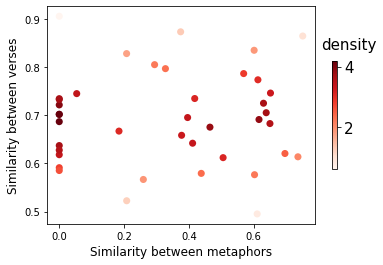

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_ee_mg_0.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


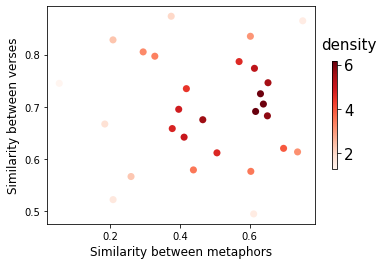

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_ee_mg.png', bbox_inches='tight')
plt.show()


In [ ]:
# This plot depicts that having 0 metaphors increases probability of having similar verses,
# and having different metaphors with less cosine similarity doesn't imply that 
# verses similarity will be less.

In [ ]:
x_list = egdf['sp_mg_met_sim'].tolist()
y_list = egdf['Gandhi - Purohit'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


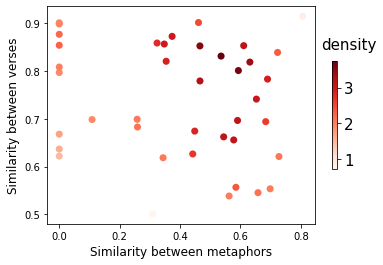

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_mg_sp_0.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


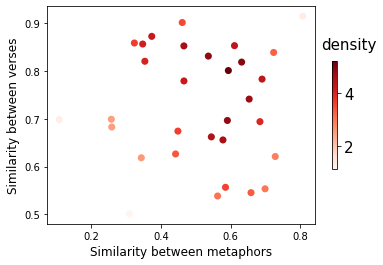

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_mg_sp.png', bbox_inches='tight')
plt.show()

In [ ]:
x_list = egdf['ee_sp_met_sim'].tolist()
y_list = egdf['Purohit - Easwaran'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


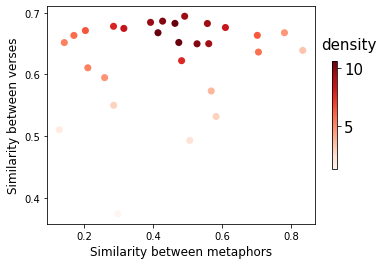

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_sp_ee.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


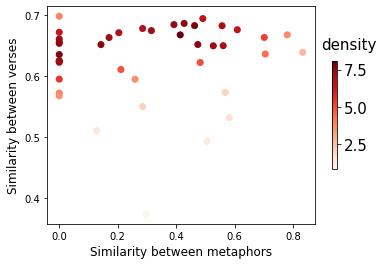

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_sp_ee_0.png', bbox_inches='tight')
plt.show()

In [ ]:
# !zip -r /content/dense_sim_ref.zip /content/images

## Chaps
####(3,5,7,8,9,10,11,12,15,16,17) 
##Similar Verses

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

In [ ]:
egdf = pd.read_csv('/content/sentimentanalysis_bhagavadgita/results/semantic analysis/all-mpnet-base-v2/cosine_similarity.csv')

In [ ]:
mdf = pd.read_csv('/content/drive/MyDrive/xlmr_mg_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)
edf = pd.read_csv('/content/drive/MyDrive/xlmr_ee_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)
sdf = pd.read_csv('/content/drive/MyDrive/xlmr_sps_metaphor.csv').sort_values(by=["chapter", "shlok"]).reset_index(drop=True)

In [ ]:
mdf

,chapter,shlok,text,list_metaphors,count_metaphors,refined,verb_refined,count_met_ref,count_verb_ref
0,1,1,"Tell me, O Sanjaya, what my sons and Pandu's...",['on'],1,[],[],0,0
1,1,2,On seeing the Arjuna's army drawn up in batt...,"['On', 'up in']",2,['up in'],[],1,0
2,1,3,"Behold, O preceptor, this mighty army of the...","['hold', 'this mighty', 'set in']",3,"['hold', 'this mighty', 'set in']",['set in'],3,1
3,1,4,"Here are brave bowmen, peers of Bhima and Ar...","['Here', 'pe', 'in']",3,"['Here', 'pe']",[],2,0
4,1,5,"Dhrishtaketu, Chekitana, valorous Kashiraja,...",[],0,[],[],0,0
...,...,...,...,...,...,...,...,...,...
692,18,73,Thus did I hear this marvellous and thrillin...,"['this', 'between', 'great', 'sou']",4,"['great', 'sou']",[],2,0
693,18,74,It was by Vyasa's favor that I listened to t...,"['to this', 'myste', 'expounded']",3,"['to this', 'myste', 'expounded']",['expounded'],3,1
694,18,75,"O King, as often as I recall that marvellous...","['recall that', 'purifying', 'between', 'fille...",5,"['recall that', 'purifying', 'filled with', 'r...","['purifying', 'filled with']",4,2
695,18,76,And as often as I recall that marvellous for...,"['recall that', 'form', 'knows', 'bounds']",4,"['recall that', 'form', 'knows', 'bounds']",[],4,0


In [ ]:
# 3, 5, 7, 8, 9, 10, 11, 12, 15, 16, 17 

In [ ]:
for i in range(1,19):
  print(len(mdf[mdf['chapter']==i]['shlok'].tolist()), len(edf[edf['chapter']==i]['shlok'].tolist()), len(sdf[sdf['chapter']==i]['shlok'].tolist()))

48 47 47
72 71 72
43 43 43
41 42 42
29 29 29
46 47 47
30 30 30
28 28 28
34 34 34
42 42 42
55 55 55
20 20 20
34 34 35
26 27 27
20 20 20
24 24 24
28 28 28
77 78 77


In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,0,3,1,"ARJUNA: O Krishna, you have said that knowled...","If, O Krishna, you hold that the attitude of...",“Arjuna questioned: My Lord! If Wisdom is abov...,0.549583,0.567935,0.855622
1,1,3,2,Your advice seems inconsistent. Give me one pa...,You do seem to confuse my understanding with...,Your language perplexes me and confuses my re...,0.386773,0.597958,0.563253
2,2,3,3,KRISHNA: At the beginning of time I declared ...,"I have spoken, before, O sinless one, of two...","Lord Shri Krishna replied: In this world, as ...",0.691872,0.596375,0.713925
3,3,3,4,One who shirks action does not attain freedom;...,Never does man enjoy freedom from action by ...,No man can attain freedom from activity by re...,0.753292,0.879323,0.837883
4,4,3,5,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mo...,He cannot even for a moment remain really ina...,0.585479,0.632467,0.669014
...,...,...,...,...,...,...,...,...,...
348,348,17,24,"Those who follow the Vedas, therefore, always...","Therefore, with AUM ever on their lips, are ...","Therefore all acts of sacrifice, gifts and au...",0.450968,0.541052,0.619735
349,349,17,25,Those seeking liberation and not any personal...,With the utterance of TAT and without the de...,Those who desire deliverance begin their acts...,0.692798,0.740188,0.789298
350,350,17,26,Sat means that which is; it also indicates go...,SAT is employed in the sense of ‘real' and ‘...,"`Sat’ means Reality or the highest Good, and ...",0.806550,0.838055,0.820397
351,351,17,27,"To be steadfast in self-sacrifice, self-disci...","Constancy in sacrifice, austerity and charit...","Conviction in sacrifice, in austerity and in ...",0.734744,0.813401,0.698825


In [ ]:
eg_new = egdf.copy().drop('Unnamed: 0', axis =1)
# eg_new = eg_new[['Chapter', 'Verse', 'Eknath Easwaran', 'Mahatma Gandhi', 'Easwaran - Gandhi']]

In [ ]:
eg_new

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,3,1,"ARJUNA: O Krishna, you have said that knowled...","If, O Krishna, you hold that the attitude of...",“Arjuna questioned: My Lord! If Wisdom is abov...,0.549583,0.567935,0.855622
1,3,2,Your advice seems inconsistent. Give me one pa...,You do seem to confuse my understanding with...,Your language perplexes me and confuses my re...,0.386773,0.597958,0.563253
2,3,3,KRISHNA: At the beginning of time I declared ...,"I have spoken, before, O sinless one, of two...","Lord Shri Krishna replied: In this world, as ...",0.691872,0.596375,0.713925
3,3,4,One who shirks action does not attain freedom;...,Never does man enjoy freedom from action by ...,No man can attain freedom from activity by re...,0.753292,0.879323,0.837883
4,3,5,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mo...,He cannot even for a moment remain really ina...,0.585479,0.632467,0.669014
...,...,...,...,...,...,...,...,...
348,17,24,"Those who follow the Vedas, therefore, always...","Therefore, with AUM ever on their lips, are ...","Therefore all acts of sacrifice, gifts and au...",0.450968,0.541052,0.619735
349,17,25,Those seeking liberation and not any personal...,With the utterance of TAT and without the de...,Those who desire deliverance begin their acts...,0.692798,0.740188,0.789298
350,17,26,Sat means that which is; it also indicates go...,SAT is employed in the sense of ‘real' and ‘...,"`Sat’ means Reality or the highest Good, and ...",0.806550,0.838055,0.820397
351,17,27,"To be steadfast in self-sacrifice, self-disci...","Constancy in sacrifice, austerity and charit...","Conviction in sacrifice, in austerity and in ...",0.734744,0.813401,0.698825


In [ ]:
mg_cmet_list = []
ee_cmet_list = []
sp_cmet_list = []
mg_cverb_list = []
ee_cverb_list = []
sp_cverb_list = []
mg_text = []
mg_vbtext = []
ee_text = []
ee_vbtext = []
sp_text = []
sp_vbtext = []

chap_list = eg_new['Chapter'].tolist()
verse_list = eg_new['Verse'].tolist()
for i in range(len(chap_list)):
  cno = int(chap_list[i])
  vno = int(verse_list[i])

  mg_cmet_list.append(int(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['count_met_ref'].values))
  ee_cmet_list.append(int(edf[edf['chapter']==cno][edf['shlok']==vno]['count_met_ref'].values))
  sp_cmet_list.append(int(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['count_met_ref'].values))

  mg_cverb_list.append(int(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['count_verb_ref'].values))
  ee_cverb_list.append(int(edf[edf['chapter']==cno][edf['shlok']==vno]['count_verb_ref'].values))
  sp_cverb_list.append(int(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['count_verb_ref'].values))

  mg_text.append(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['refined'].values)
  ee_text.append(edf[edf['chapter']==cno][edf['shlok']==vno]['refined'].values)
  sp_text.append(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['refined'].values)

  mg_vbtext.append(mdf[mdf['chapter']==cno][mdf['shlok']==vno]['verb_refined'].values)
  ee_vbtext.append(edf[edf['chapter']==cno][edf['shlok']==vno]['verb_refined'].values)
  sp_vbtext.append(sdf[sdf['chapter']==cno][sdf['shlok']==vno]['verb_refined'].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/li

In [ ]:
egdf['mg_cmet'] = mg_cmet_list
egdf['mg_cverb'] = mg_cverb_list
egdf['mg_met'] = mg_text
egdf['mg_verb'] = mg_vbtext

egdf['ee_cmet'] = ee_cmet_list
egdf['ee_cverb'] = ee_cverb_list
egdf['ee_met'] = ee_text
egdf['ee_verb'] = ee_vbtext

egdf['sp_cmet'] = sp_cmet_list
egdf['sp_cverb'] = sp_cverb_list
egdf['sp_met'] = sp_text
egdf['sp_verb'] = sp_vbtext

In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,mg_cmet,...,mg_met,mg_verb,ee_cmet,ee_cverb,ee_met,ee_verb,sp_cmet,sp_cverb,sp_met,sp_verb
0,0,3,1,"ARJUNA: O Krishna, you have said that knowled...","If, O Krishna, you hold that the attitude of...",“Arjuna questioned: My Lord! If Wisdom is abov...,0.549583,0.567935,0.855622,3,...,"[['hold', 'attitude', 'detachment']]",[[]],2,0,"[['greater', 'war']]",[[]],4,0,"[['Lord', 'above action', 'in this', 'fight']]",[[]]
1,1,3,2,Your advice seems inconsistent. Give me one pa...,You do seem to confuse my understanding with...,Your language perplexes me and confuses my re...,0.386773,0.597958,0.563253,3,...,"[['with perplex', 'attain', 'Lord']]",[[]],3,2,"[['Give', 'path', 'follow to']]","[['Give', 'follow to']]",2,0,"[['way', 'secure']]",[[]]
2,2,3,3,KRISHNA: At the beginning of time I declared ...,"I have spoken, before, O sinless one, of two...","Lord Shri Krishna replied: In this world, as ...",0.691872,0.596375,0.713925,1,...,[['attitudes in this']],[[]],6,1,"[['beginning', 'declare', 'paths', 'pure', 'ti...",[['beginning']],4,0,"[['In this', 'fold path', 'Path', 'Path']]",[[]]
3,3,3,4,One who shirks action does not attain freedom;...,Never does man enjoy freedom from action by ...,No man can attain freedom from activity by re...,0.753292,0.879323,0.837883,2,...,"[['enjoy freedom from', 'attain that freedom']]",[[]],3,0,"[['shir', 'attain freedom', 'gain']]",[[]],2,0,"[['attain freedom from', 'reach']]",[[]]
4,4,3,5,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mo...,He cannot even for a moment remain really ina...,0.585479,0.632467,0.669014,2,...,"[['compelle', 's']]",[[]],3,1,"[['rest', 'driven to', 'nature']]",[['driven to']],1,0,[['compel']],[[]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,348,17,24,"Those who follow the Vedas, therefore, always...","Therefore, with AUM ever on their lips, are ...","Therefore all acts of sacrifice, gifts and au...",0.450968,0.541052,0.619735,2,...,"[['lips', 'rule']]",[[]],1,1,[['follow']],[['follow']],1,0,[['pre']],[[]]
349,349,17,25,Those seeking liberation and not any personal...,With the utterance of TAT and without the de...,Those who desire deliverance begin their acts...,0.692798,0.740188,0.789298,2,...,"[['tterance', 'seeking']]",[['seeking']],3,2,"[['Those seeking', 'add', 'these act']]","[['Those seeking', 'add']]",1,0,[['act']],[[]]
350,350,17,26,Sat means that which is; it also indicates go...,SAT is employed in the sense of ‘real' and ‘...,"`Sat’ means Reality or the highest Good, and ...",0.806550,0.838055,0.820397,2,...,"[['sense', 'applied to beautiful']]","[['applied to beautiful', 'applied to beautifu...",1,0,[['means that']],[[]],1,0,[['highest']],[[]]
351,351,17,27,"To be steadfast in self-sacrifice, self-disci...","Constancy in sacrifice, austerity and charit...","Conviction in sacrifice, in austerity and in ...",0.734744,0.813401,0.698825,0,...,[[]],[[]],3,0,"[['sat', 'with these', 'sat']]",[[]],2,1,"[['called', 'Sat']]",[['called']]


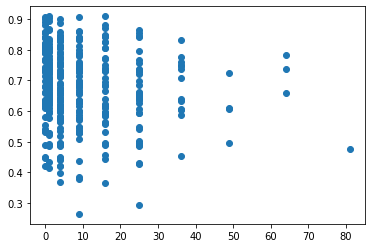

In [ ]:
li = list(zip([1*(number ** 2) for number in egdf['mg_cmet'].tolist()] + [-1*(number ** 2) for number in egdf['ee_cmet'].tolist()], egdf['Easwaran - Gandhi'].tolist()))
plt.scatter(*zip(*li))
plt.show()

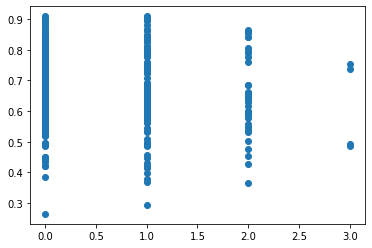

In [ ]:
li = list(zip(egdf['mg_cverb'].tolist()+egdf['ee_cverb'].tolist(), egdf['Easwaran - Gandhi'].tolist()))
plt.scatter(*zip(*li))
plt.show()

In [ ]:
!pip install sentence_transformers &> /dev/null
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
mg_new = egdf['mg_met'].tolist()
ee_new = egdf['ee_met'].tolist()
sp_new = egdf['sp_met'].tolist()

mg_new[0]

array(["['hold', 'attitude', 'detachment']"], dtype=object)

In [ ]:
mg_new[0][0]

"['hold', 'attitude', 'detachment']"

In [ ]:
def get_mlist(newer_list):
  nlist = []
  nnlist = []
  for i in newer_list:
    i = i[0][1:-1]
    words= i.split(',')
    for j in words:
      j = j.replace("'",'')
      nlist.append(j)
  for i in range(len(nlist)):
    if len(nlist[i])>1:
      if nlist[i][0]==' ':
        nnlist.append(nlist[i][1:])
      else:
        nnlist.append(nlist[i])
  return nnlist

In [ ]:
nn_mg = get_mlist(mg_new)
nn_ee = get_mlist(ee_new)
nn_sp = get_mlist(sp_new)

In [ ]:
nn_mg

['hold',
 'attitude',
 'detachment',
 'with perplex',
 'attain',
 'Lord',
 'attitudes in this',
 'enjoy freedom from',
 'attain that freedom',
 'compelle',
 's',
 'cur',
 'allows',
 'dwell on',
 'object',
 'keeping',
 'under control',
 'engage',
 'attachment',
 'course',
 'This world',
 'suffer',
 'to this end',
 'attachment',
 'Together with',
 'Lord',
 'By this',
 'giver',
 'With this',
 'attain',
 'highest',
 'bestow on',
 'without rendering',
 'unto',
 'free',
 'springs',
 'born',
 'comes',
 'action spring',
 'pervad',
 'firm',
 'found',
 'follow',
 'wheel',
 'set in motion',
 'sating',
 'has',
 'end',
 'view to',
 'guidance',
 'set',
 'follow',
 'world',
 'worth',
 'follow',
 'way',
 'end',
 'with attachment',
 'unattache',
 'attached to',
 'unattache',
 'gunas',
 'sense',
 'do',
 'activities',
 'operate on',
 'attached to',
 'things',
 'have',
 'Cast',
 'fixed on',
 'indwelling',
 'shake off',
 'fight',
 'rule',
 'laid down',
 'released from',
 'bondage',
 'rule',
 'lost',
 'natu

In [ ]:
sum(egdf['mg_cmet'].tolist())

888

In [ ]:
len(nn_mg)

888

In [ ]:
nn_mg_enc = model.encode(nn_mg)
nn_ee_enc = model.encode(nn_ee)
nn_sp_enc = model.encode(nn_sp)

In [ ]:
nn_mg_enc.shape

(888, 768)

In [ ]:
nn_mg_enc[0, :].shape

(768,)

In [ ]:
mgenc_list = []
lol = 0
for i in egdf['mg_cmet'].tolist():
  mgenc_list.append(sum(nn_mg_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
eeenc_list = []
lol = 0 
for i in egdf['ee_cmet'].tolist():
  eeenc_list.append(sum(nn_ee_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
spenc_list = []
lol = 0 
for i in egdf['sp_cmet'].tolist():
  spenc_list.append(sum(nn_sp_enc[lol:lol+i, :]))
  lol+=i

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(mgenc_list[0].reshape(1,-1), eeenc_list[0].reshape(1,-1))

array([[0.44571006]], dtype=float32)

In [ ]:
import numpy as np
mg_ee_met_sim = []
ee_sp_met_sim = []
sp_mg_met_sim = []
for i in range(len(mgenc_list)):
  if type(mgenc_list[i])==np.ndarray and type(eeenc_list[i])==np.ndarray:
    mg_ee_met_sim.append(cosine_similarity(mgenc_list[i].reshape(1,-1), eeenc_list[i].reshape(1,-1))[0][0])
  else:
    mg_ee_met_sim.append(0)

for i in range(len(eeenc_list)):
  if type(spenc_list[i])==np.ndarray and type(eeenc_list[i])==np.ndarray:
    ee_sp_met_sim.append(cosine_similarity(spenc_list[i].reshape(1,-1), eeenc_list[i].reshape(1,-1))[0][0])
  else:
    ee_sp_met_sim.append(0)

for i in range(len(mgenc_list)):
  if type(mgenc_list[i])==np.ndarray and type(spenc_list[i])==np.ndarray:
    sp_mg_met_sim.append(cosine_similarity(mgenc_list[i].reshape(1,-1), spenc_list[i].reshape(1,-1))[0][0])
  else:
    sp_mg_met_sim.append(0)

In [ ]:
egdf['mg_ee_met_sim'] = mg_ee_met_sim
egdf['ee_sp_met_sim'] = ee_sp_met_sim
egdf['sp_mg_met_sim'] = sp_mg_met_sim

In [ ]:
egdf

,Unnamed: 0,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,mg_cmet,...,ee_cverb,ee_met,ee_verb,sp_cmet,sp_cverb,sp_met,sp_verb,mg_ee_met_sim,ee_sp_met_sim,sp_mg_met_sim
0,0,3,1,"ARJUNA: O Krishna, you have said that knowled...","If, O Krishna, you hold that the attitude of...",“Arjuna questioned: My Lord! If Wisdom is abov...,0.549583,0.567935,0.855622,3,...,0,"[['greater', 'war']]",[[]],4,0,"[['Lord', 'above action', 'in this', 'fight']]",[[]],0.445710,0.553152,0.505692
1,1,3,2,Your advice seems inconsistent. Give me one pa...,You do seem to confuse my understanding with...,Your language perplexes me and confuses my re...,0.386773,0.597958,0.563253,3,...,2,"[['Give', 'path', 'follow to']]","[['Give', 'follow to']]",2,0,"[['way', 'secure']]",[[]],0.418256,0.421955,0.401757
2,2,3,3,KRISHNA: At the beginning of time I declared ...,"I have spoken, before, O sinless one, of two...","Lord Shri Krishna replied: In this world, as ...",0.691872,0.596375,0.713925,1,...,1,"[['beginning', 'declare', 'paths', 'pure', 'ti...",[['beginning']],4,0,"[['In this', 'fold path', 'Path', 'Path']]",[[]],0.250401,0.743432,0.198485
3,3,3,4,One who shirks action does not attain freedom;...,Never does man enjoy freedom from action by ...,No man can attain freedom from activity by re...,0.753292,0.879323,0.837883,2,...,0,"[['shir', 'attain freedom', 'gain']]",[[]],2,0,"[['attain freedom from', 'reach']]",[[]],0.619747,0.517016,0.682524
4,4,3,5,"Indeed, there is no one who rests for even an ...",For none ever remains inactive even for a mo...,He cannot even for a moment remain really ina...,0.585479,0.632467,0.669014,2,...,1,"[['rest', 'driven to', 'nature']]",[['driven to']],1,0,[['compel']],[[]],0.327840,0.285063,0.727761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,348,17,24,"Those who follow the Vedas, therefore, always...","Therefore, with AUM ever on their lips, are ...","Therefore all acts of sacrifice, gifts and au...",0.450968,0.541052,0.619735,2,...,1,[['follow']],[['follow']],1,0,[['pre']],[[]],0.315835,0.717679,0.318827
349,349,17,25,Those seeking liberation and not any personal...,With the utterance of TAT and without the de...,Those who desire deliverance begin their acts...,0.692798,0.740188,0.789298,2,...,2,"[['Those seeking', 'add', 'these act']]","[['Those seeking', 'add']]",1,0,[['act']],[[]],0.319574,0.314621,0.263560
350,350,17,26,Sat means that which is; it also indicates go...,SAT is employed in the sense of ‘real' and ‘...,"`Sat’ means Reality or the highest Good, and ...",0.806550,0.838055,0.820397,2,...,0,[['means that']],[[]],1,0,[['highest']],[[]],0.292923,0.152580,0.311115
351,351,17,27,"To be steadfast in self-sacrifice, self-disci...","Constancy in sacrifice, austerity and charit...","Conviction in sacrifice, in austerity and in ...",0.734744,0.813401,0.698825,0,...,0,"[['sat', 'with these', 'sat']]",[[]],2,1,"[['called', 'Sat']]",[['called']],0.000000,0.395161,0.000000


In [ ]:
x_list = egdf['mg_ee_met_sim'].tolist()
y_list = egdf['Easwaran - Gandhi'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


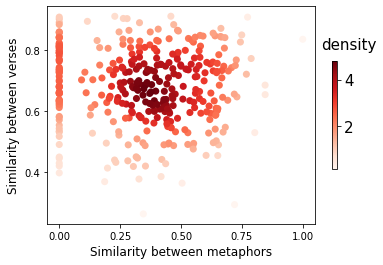

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_ee_mg_0.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


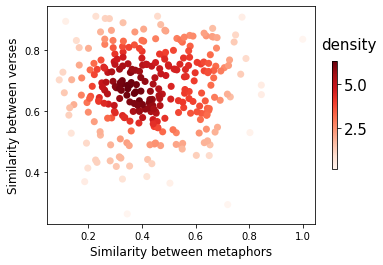

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_ee_mg.png', bbox_inches='tight')
plt.show()


In [ ]:
# This plot depicts that having 0 metaphors increases probability of having similar verses,
# and having different metaphors with less cosine similarity doesn't imply that 
# verses similarity will be less.

In [ ]:
x_list = egdf['sp_mg_met_sim'].tolist()
y_list = egdf['Gandhi - Purohit'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


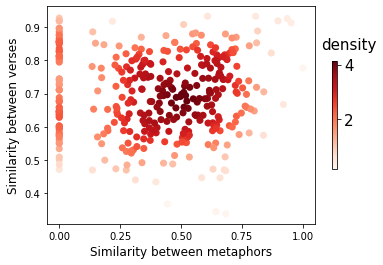

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_mg_sp_0.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


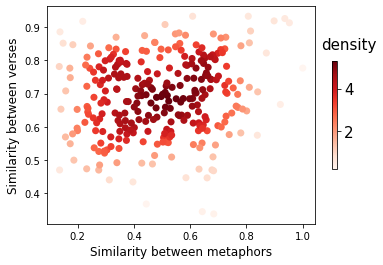

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_mg_sp.png', bbox_inches='tight')
plt.show()

In [ ]:
x_list = egdf['ee_sp_met_sim'].tolist()
y_list = egdf['Purohit - Easwaran'].tolist()
xx_list = []
yy_list = []
for i in range(len(y_list)):
  if x_list[i]!=0:
    xx_list.append(x_list[i])
    yy_list.append(y_list[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


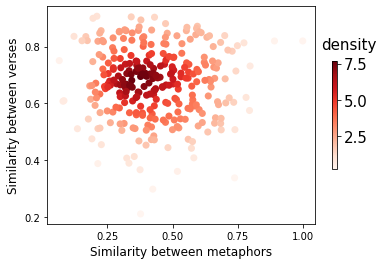

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = xx_list
y = yy_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_sp_ee.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


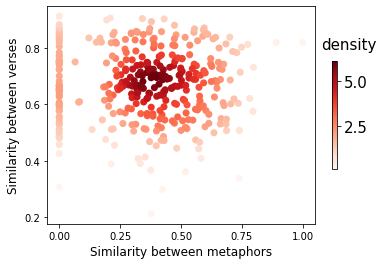

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = x_list
y = y_list
# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=50, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 10,family = 'Times New Roman')
plt.yticks(size = 10,family = 'Times New Roman')
plt.xlabel('Similarity between metaphors',size = 12,family = 'Times New Roman')
plt.ylabel('Similarity between verses',size = 12,family = 'Times New Roman')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 15,family = 'Times New Roman')
plt.savefig('/content/images/sim_plt_sp_ee_0.png', bbox_inches='tight')
plt.show()

In [ ]:
!zip -r /content/dense_sim_ref.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/sim_plt_mg_sp.png (deflated 1%)
  adding: content/images/sim_plt_ee_mg_0.png (deflated 1%)
  adding: content/images/sim_plt_ee_mg.png (deflated 1%)
  adding: content/images/sim_plt_mg_sp_0.png (deflated 1%)
  adding: content/images/sim_plt_sp_ee.png (deflated 1%)
  adding: content/images/sim_plt_sp_ee_0.png (deflated 1%)
